In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트명을 설정합니다.

In [46]:
metro_st1 =[]
# metro_st = []

In [54]:
def metro(year, locate):
    import pandas as pd
    import csv

    station_list = [
        "압구정",
        "압구정로데오",
        "신사",
        "논현",
        "신논현",
        "강남",
        "양재",
        "매봉",
        "한티",
        "선릉",
        "학동",
        "언주",
        "매봉",
        "대치",
        "도곡",
        "개포동",
        "대청",
        "일원",
        "수서",
        "봉은사",
        "청담",
    ]
    station_list2 = ["온수", "개봉", "구로", "신도림"]
    input_file = "data/CARD_SUBWAY_MONTH_%d.csv" % year
    output_file = "data/CARD_SUBWAY_MONTH_%d_fixed.csv" % year

    with open(input_file, "r", encoding="euc-kr") as f_in, open(
        output_file, "w", newline="", encoding="euc-kr"
    ) as f_out:
        reader = csv.reader(f_in)
        writer = csv.writer(f_out)

        for row in reader:
            if len(row) > 7:
                row1 = row[:7]
                row2 = row[7:]
                writer.writerow(row1)
                writer.writerow(row2)
            else:
                writer.writerow(row)

    subway = pd.read_csv(output_file, encoding="euc-kr", index_col=False)
    subway_df = subway.drop("등록일자", axis=1)
    subway_df.set_index("역명", inplace=True)
    subway_df = subway_df.drop("사용일자", axis=1)
    subway_sum = subway_df.groupby("역명").sum()

    filtered_data1 = subway_sum[subway_sum.index.isin(station_list)]
    extracted_data1 = filtered_data1[["승차총승객수", "하차총승객수"]]

    filtered_data2 = subway_sum[subway_sum.index.isin(station_list2)]
    extracted_data2 = filtered_data2[["승차총승객수", "하차총승객수"]]

    filtered_data1["지역구"] = "강남"

    if locate == '강남구':
        extracted_data1 = filtered_data1[["지역구", "승차총승객수", "하차총승객수"]]
        extracted_data1.set_index("지역구", inplace=True)
        extracted_data_df1 = extracted_data1.groupby("지역구").sum()
        tmp = int(extracted_data_df1.승차총승객수 + extracted_data_df1.하차총승객수.values)
        return tmp

    if locate == '구로구':
        filtered_data2["지역구"] = "구로"
        extracted_data2 = filtered_data2[["지역구", "승차총승객수", "하차총승객수"]]
        extracted_data2.set_index("지역구", inplace=True)
        extracted_data_df2 = extracted_data2.groupby("지역구").sum()
        tmp = int(extracted_data_df2.승차총승객수 + extracted_data_df2.하차총승객수.values)
        return tmp


def show_array_contents(array):
    for i, item in enumerate(array):
        print(f"인덱스 {i}: {item}")


def metro_tmp(tmp, array):
    array.append(tmp)
    show_array_contents(array)


result = metro(2015, '강남구')
metro_tmp(result, metro_st1)

인덱스 0: 296722781
인덱스 1: 270119854
인덱스 2: 268894158
인덱스 3: 352932950
인덱스 4: 342170117
인덱스 5: 337119842
인덱스 6: 358616958
인덱스 7: 364619254


C:\Users\IN205\AppData\Local\Temp\ipykernel_10452\1020503145.py:51: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subway_sum = subway_df.groupby("역명").sum()
C:\Users\IN205\AppData\Local\Temp\ipykernel_10452\1020503145.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"


In [58]:
metro_st


[60743513, 56398784, 78652136, 79255005, 80804960, 92814301, 95689185]

In [59]:
metro_st1

[296722781,
 270119854,
 268894158,
 352932950,
 342170117,
 337119842,
 358616958,
 364619254]

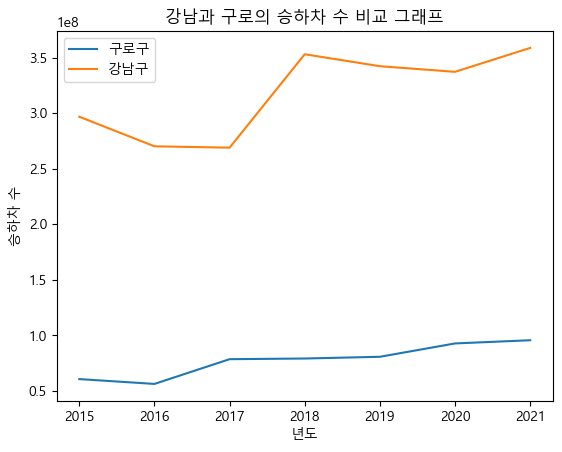

In [66]:
import matplotlib.pyplot as plt

def create_line_chart(x, y, label):
    plt.plot(x, y, label=label)
    x = 2015


# 배열의 인덱스를 x 값으로 사용
x = range(2015, 2015 +len(metro_st))

# 선형 그래프 생성
create_line_chart(x, metro_st, label='구로구')
create_line_chart(x, metro_st1[:len(metro_st)], label='강남구')

# 그래프 레이블, 제목, 범례 설정 및 출력
plt.xlabel("년도")
plt.ylabel("승하차 수")
plt.title("강남과 구로의 승하차 수 비교 그래프")
plt.legend()

# 그래프 출력
plt.show()